In [1]:
from utils import *
from scipy import optimize
import matplotlib

In [2]:
for i in range(0, 100):
    kernel = NTK(depth = 3+i, bias=3)
    # kernel = Matern(nu=0.5)
    x = np.array([0.2672612, 0.5345225, 0.8017837]).reshape(1,-1)
    y = np.array([0.4558423, 0.5698029, 0.6837635]).reshape(1,-1)
    print(f'Depth: {3+i} Value: ', kernel(y, y))

Depth: 3 Value:  [[1.00000001]]
Depth: 4 Value:  [[1.00000001]]
Depth: 5 Value:  [[1.00000001]]
Depth: 6 Value:  [[1.00000001]]
Depth: 7 Value:  [[1.00000001]]
Depth: 8 Value:  [[1.00000001]]
Depth: 9 Value:  [[1.00000001]]
Depth: 10 Value:  [[1.00000001]]
Depth: 11 Value:  [[1.00000001]]
Depth: 12 Value:  [[1.00000001]]
Depth: 13 Value:  [[1.00000001]]
Depth: 14 Value:  [[1.00000001]]
Depth: 15 Value:  [[1.00000001]]
Depth: 16 Value:  [[1.00000001]]
Depth: 17 Value:  [[1.00000001]]
Depth: 18 Value:  [[1.00000001]]
Depth: 19 Value:  [[1.00000001]]
Depth: 20 Value:  [[1.00000001]]
Depth: 21 Value:  [[1.00000001]]
Depth: 22 Value:  [[1.00000001]]
Depth: 23 Value:  [[1.00000001]]
Depth: 24 Value:  [[1.00000001]]
Depth: 25 Value:  [[1.00000001]]
Depth: 26 Value:  [[1.00000001]]
Depth: 27 Value:  [[1.00000001]]
Depth: 28 Value:  [[1.00000001]]
Depth: 29 Value:  [[1.00000001]]
Depth: 30 Value:  [[1.00000001]]
Depth: 31 Value:  [[1.00000001]]
Depth: 32 Value:  [[1.00000001]]
Depth: 33 Value: 

In [3]:
z = np.linspace(-2, 2, 100)
x = (z**2 + 1) * np.sin(np.linspace(-np.pi, np.pi, 100))
y = (z**2 + 1) * np.cos(np.linspace(-np.pi, np.pi, 100))

datasets = processing(x, y, z, noise = 0.15)
X, y = datasets['orig']
X_norm, _ = datasets['norm']
X_train, y_train, y_train_noisy = datasets['orig train']
X_norm_train, _, _ = datasets['norm train']

In [4]:
kernel = NTK(depth = 3)
gp = GPR(kernel=kernel, normalize_y=True, alpha=1e-5, n_restarts_optimizer=9, random_state=3480795)
gp.fit(X_train, y_train)
gp.kernel_

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NTK(depth=3, c=2.000, bias=3.078)

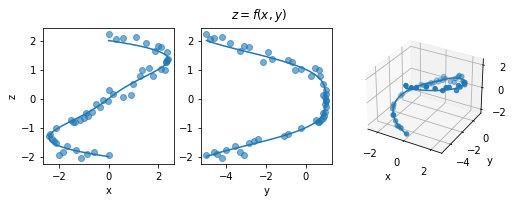

In [5]:
fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$", figsize=(8, 2.5))
fig.savefig('./illustrative/dataset.svg')

In [6]:
ntk_1 = (
    ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
    NTK(depth=3, c=2, bias=1e-9, 
        bias_bounds=(1e-9, 1e2))
)

gp_ntk_1 = GPR(kernel=ntk_1, normalize_y=True, alpha=1e-5, n_restarts_optimizer=9, random_state=3480795)
gp_ntk_1.fit(X_train, y_train)
mean_ntk_1 = gp_ntk_1.predict(X)

gp_ntk_1.kernel_

# lpk_1 = (
#     ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
#     Matern(length_scale=np.linalg.norm(xn-yn)/np.log(1/ntk_val_n),
#         length_scale_bounds='fixed',#(1e-9, 1e3), 
#         nu=1/2)
# )

0.23**2 * NTK(depth=3, c=2.000, bias=0.000)

(<Figure size 720x216 with 3 Axes>,
 array([<AxesSubplot:xlabel='x', ylabel='z'>, <AxesSubplot:xlabel='y'>,
        <Axes3DSubplot:xlabel='x', ylabel='y'>], dtype=object))

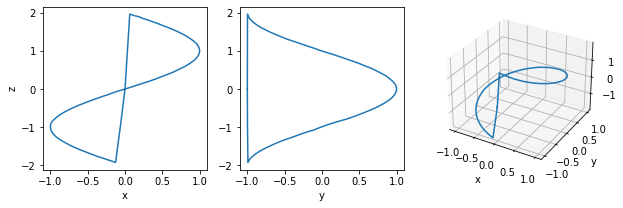

In [7]:
plot(X_norm, mean_ntk_1.ravel(), typ='data')